# Não precisa alterar nada aqui

In [6]:
from pathlib import Path
import pandas as pd
from calendar import monthrange as mt
from datetime import timedelta, datetime
from re import compile as cp
import matplotlib.pyplot as plt
import matplotlib as mpl


mpl.style.use('ggplot')
mpl.rcParams['font.family'] = ['Family1', 'Serif', 'cursive', 'bold']
mpl.rcParams['font.size'] = 40

### Realiza a pesquisa por dias faltantes para cada mês. Ao ser encontrado dias que estão faltando, é criado um arquivo para aquele dia

In [7]:
ano = 2005
pesquisa_digitos = cp('\d\d')
pasta_principal = Path('DadosMeteoros')
pastas_dados = pasta_principal.glob(f'{ano}*')
for pasta in pastas_dados:
    mes_str =str(pasta)[-2:]
    mes_int = int(mes_str)
    quantidade_dias_mes = mt(year=ano, month=mes_int)[1]
    arquivos = Path(pasta).glob('*.mpd')
    dias_base = [int(''.join(pesquisa_digitos.findall(str(dia)))[-2:]) for dia in arquivos]
    dias_completos = range(1, quantidade_dias_mes+1)
    dias_faltantes = set(dias_completos)^set(dias_base)
    for dia in dias_faltantes:
        nome = pasta/f'mp2005{mes_str}{dia}.cariri.mpd'
        with open(nome, 'w') as f:
            f.writelines('')


### Realiza a soma de todas os registros de meteoros por dia que n possuiem ambiguidade. O processo se repete para cada mês. Ao final será salvo os números em um arquivo de texto(numeros_meteoros.txt) para o ano em que se está trabalhando.

In [9]:
colunas = ['Date','Ambig']
meses = pasta_principal.glob(f'{ano}*')
meses = sorted(meses)
soma_total = []
for pasta in meses:
    arquivos = pasta.glob('*.mpd')
    arquivos = sorted(arquivos)
    for arquivo in arquivos:
        try:
            df = pd.read_csv(arquivo, usecols=colunas,skiprows=28, sep='\s+')
            selecionados= (df['Ambig'] >=2)
            df2 = df.loc[~selecionados].reset_index()
            quantida_meteooro = df2['Ambig'].count()
            soma_total.append(quantida_meteooro)
        except:
            soma_total.append(0)

dias = pd.date_range(start=f'2005-01-01', end=f'2005-12-31', freq='1D').get_level_values(0)
soma_quantidade = pd.DataFrame(soma_total, columns=['soma'])
soma_quantidade['dias'] = dias
soma_quantidade.to_string('numero_meteoros.txt', index=False)

### Nomes e datas do registro das chuvas de meteoros e atribuição de uma cor para cada chuva

In [10]:
datas = [['2005-01-01', '2005-01-24'],
    ['2005-01-28', '2005-02-21'],
    ['2005-02-25', '2005-03-22'],
    ['2005-04-16', '2005-04-25'],
    ['2005-04-19', '2005-05-28'],
    ['2005-04-15', '2005-07-15'],
    ['2005-07-15', '2005-08-25'],
    ['2005-09-05', '2005-10-10'],
    ['2005-12-07', '2005-12-17']]

chuvas = ['Delta Cancrids','Aufa Centaurids',
'Gama Normids','Lyrids','Eta-Aquarids',
'Sagitarids','Delta-Aquarids do Norte','Delta Aurids','Geminids']

cores = ['#1EFF0D', '#E8B00C', '#FF1100', '#450CE8', '#00FFE1', 
'#E80C82', '#21EBA8', '#D7FF00', '#FF900D']

### Plotando os dados e salvando a imagem na pasta fig

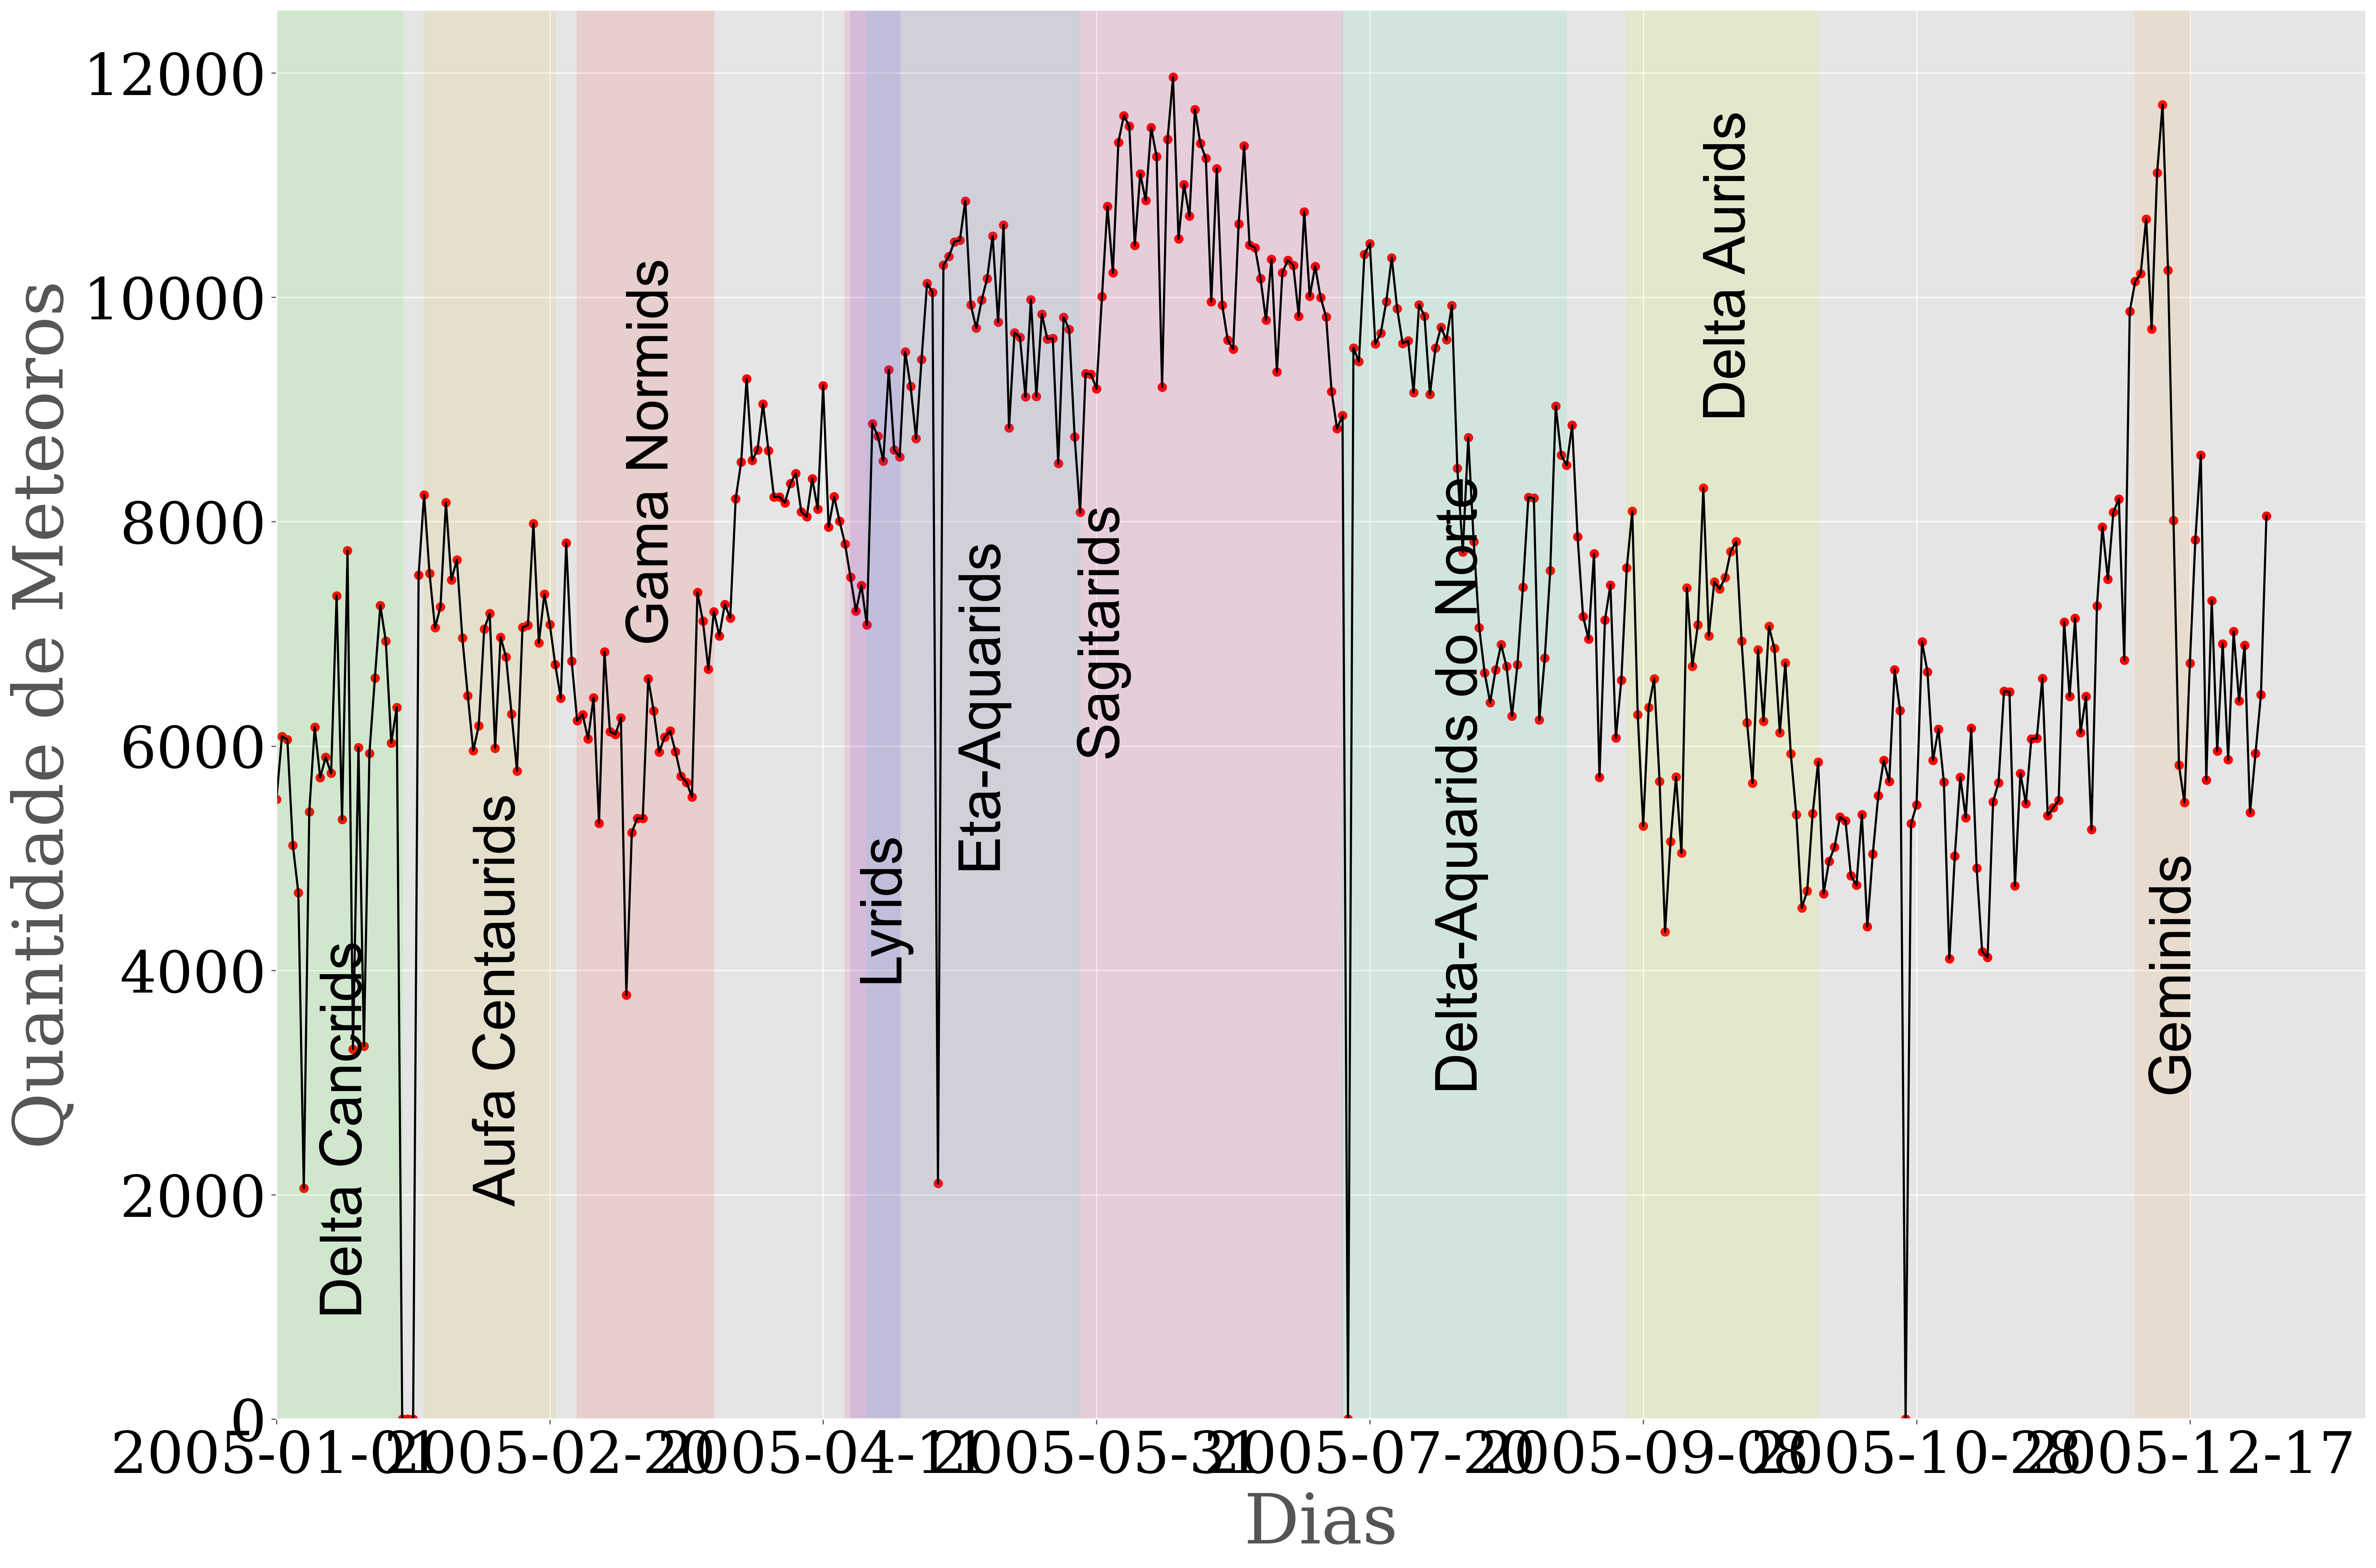

In [11]:
dpi = 300
tempo_t = pd.date_range(start=f'{ano}-01-01', end=f'{ano}-12-31')

fig, ax = plt.subplots(1,1, figsize=(26, 18), dpi=dpi)
arq = pd.read_csv('numero_meteoros.txt', sep='\s+')
arq.set_index(arq['dias'], inplace=True)
arq.drop('dias', axis=1, inplace=True)
arq.plot(ax=ax, color='k', legend=False)
ax.scatter(arq.index.values, arq['soma'], color = "r", marker = "o", label='Soma')
ax.set_xlabel('Dias')
ax.set_ylabel('Quantidade de Meteoros')

plt.xlim(left=0)
plt.ylim(bottom=0)
plt.yticks(color='k')
plt.xticks(color='k')


for chu, data, cor, altura in zip(chuvas, datas, cores, range(1000, 10000, 1000)):
    inicio = datetime.strptime(data[0], '%Y-%m-%d').date()
    final = datetime.strptime(data[1], '%Y-%m-%d').date()
    ax.axvspan(data[0], data[1], 0, color=cor, alpha=0.1)
    meio_da_chuva = ((final-inicio)/2).days
    data_chu = inicio+timedelta(days=meio_da_chuva-3)

    if data[0] == '2005-01-01':
        ax.text(str(data_chu), altura, chu, rotation=90, fontdict={'font':'Arial', 'size':40, 'color':'black'})
    elif data[0] == '2005-01-28':
        ax.text(str(data_chu), altura, chu, rotation=90, fontdict={'font':'Arial', 'size':40, 'color':'black'})
    elif data[0] == '2005-02-25':
        ax.text(str(data_chu), altura+4000, chu, rotation=90, fontdict={'font':'Arial', 'size':40, 'color':'black'})
    elif data[0] == '2005-04-16':
        ax.text(str(data_chu), altura, chu, rotation=90, fontdict={'font':'Arial', 'size':40, 'color':'black'})

    elif data[0] == '2005-04-19':
        ax.text(str(data_chu), altura, chu, rotation=90, fontdict={'font':'Arial', 'size':40, 'color':'black'})
    elif data[0] == '2005-04-15':
        ax.text(str(data_chu), altura, chu, rotation=90, fontdict={'font':'Arial', 'size':40, 'color':'black'})
    elif data[0] == '2005-07-15':
        ax.text(str(data_chu), altura-4000, chu, rotation=90, fontdict={'font':'Arial', 'size':40, 'color':'black'})
    elif data[0] == '2005-09-05':
        ax.text(str(data_chu), altura+1000, chu, rotation=90, fontdict={'font':'Arial', 'size':40, 'color':'black'})
    elif data[0] == '2005-12-07':
        ax.text(str(data_chu), altura-6000, chu, rotation=90, fontdict={'font':'Arial', 'size':40, 'color':'black'})

fig.savefig('figura_chuvas.png', dpi=dpi)
plt.show()